In [1]:
import pandas as pd
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

In [2]:
df = pd.read_csv("cotizacion.csv",delimiter=";")

In [3]:
df.head()

,DESDE,COTIZACION
0,13/9/2013 00:00,0.00
1,19/9/2013 00:00,5.76
2,20/9/2013 00:00,5.76
3,24/9/2013 00:00,5.84
4,25/9/2013 00:00,5.84


In [4]:
# Campo Desde es un String
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DESDE       1534 non-null   object 
 1   COTIZACION  1534 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.1+ KB


##### Generación de Date Time a través de lambda

In [5]:
df['DataTime'] = df.DESDE.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M'))

##### Generación de indice con campo de DataFrame

In [6]:
df.index = df.DataTime

In [7]:
df.drop(columns = ['DataTime','DESDE'], inplace = True)

In [8]:
df.head()

,COTIZACION
DataTime,
2013-09-13,0.00
2013-09-19,5.76
2013-09-20,5.76
2013-09-24,5.84
2013-09-25,5.84


In [9]:
df.interpolate()

,COTIZACION
DataTime,
2013-09-13,0.00
2013-09-19,5.76
2013-09-20,5.76
2013-09-24,5.84
2013-09-25,5.84
...,...
2020-10-21,77.71
2020-10-22,78.05
2020-10-23,78.09


In [16]:
result = seasonal_decompose(df.COTIZACION, model='additive',period=365)

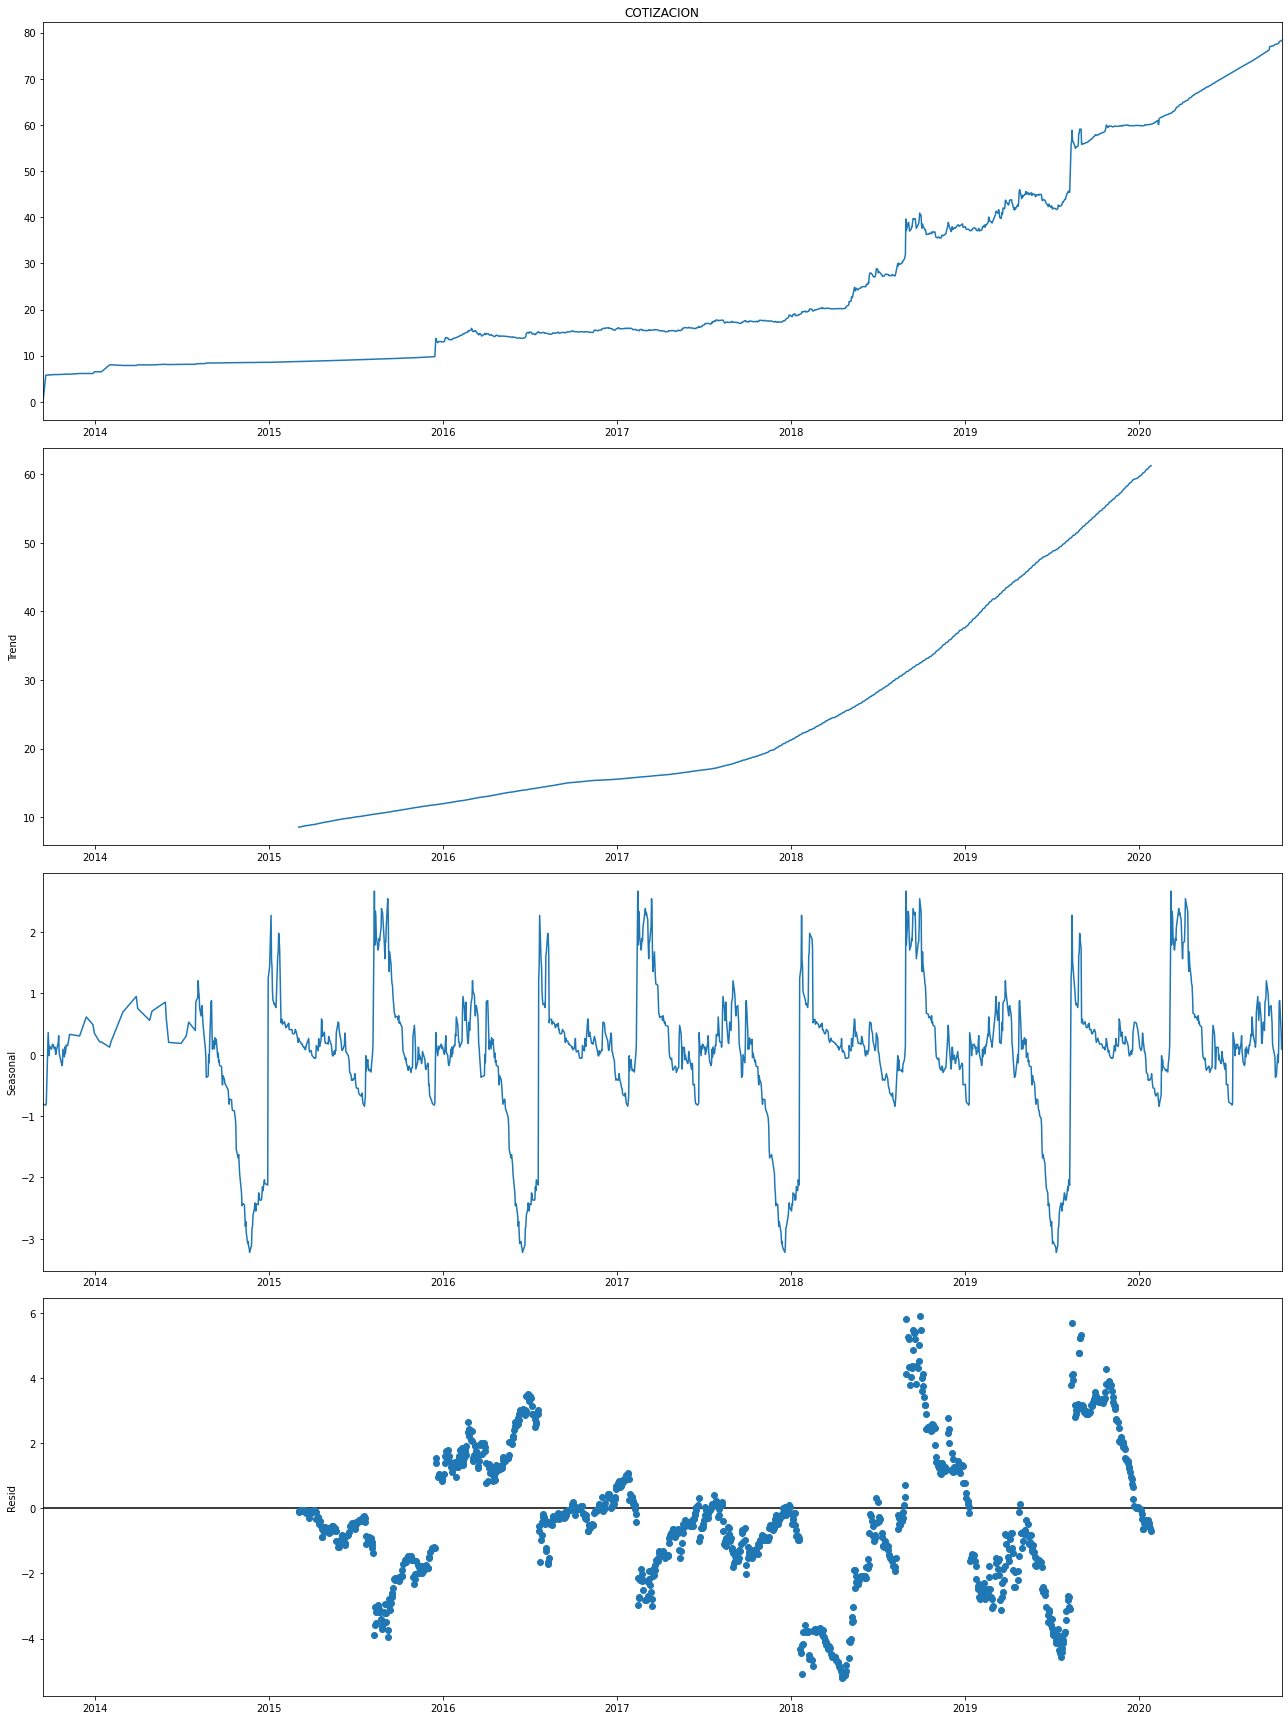

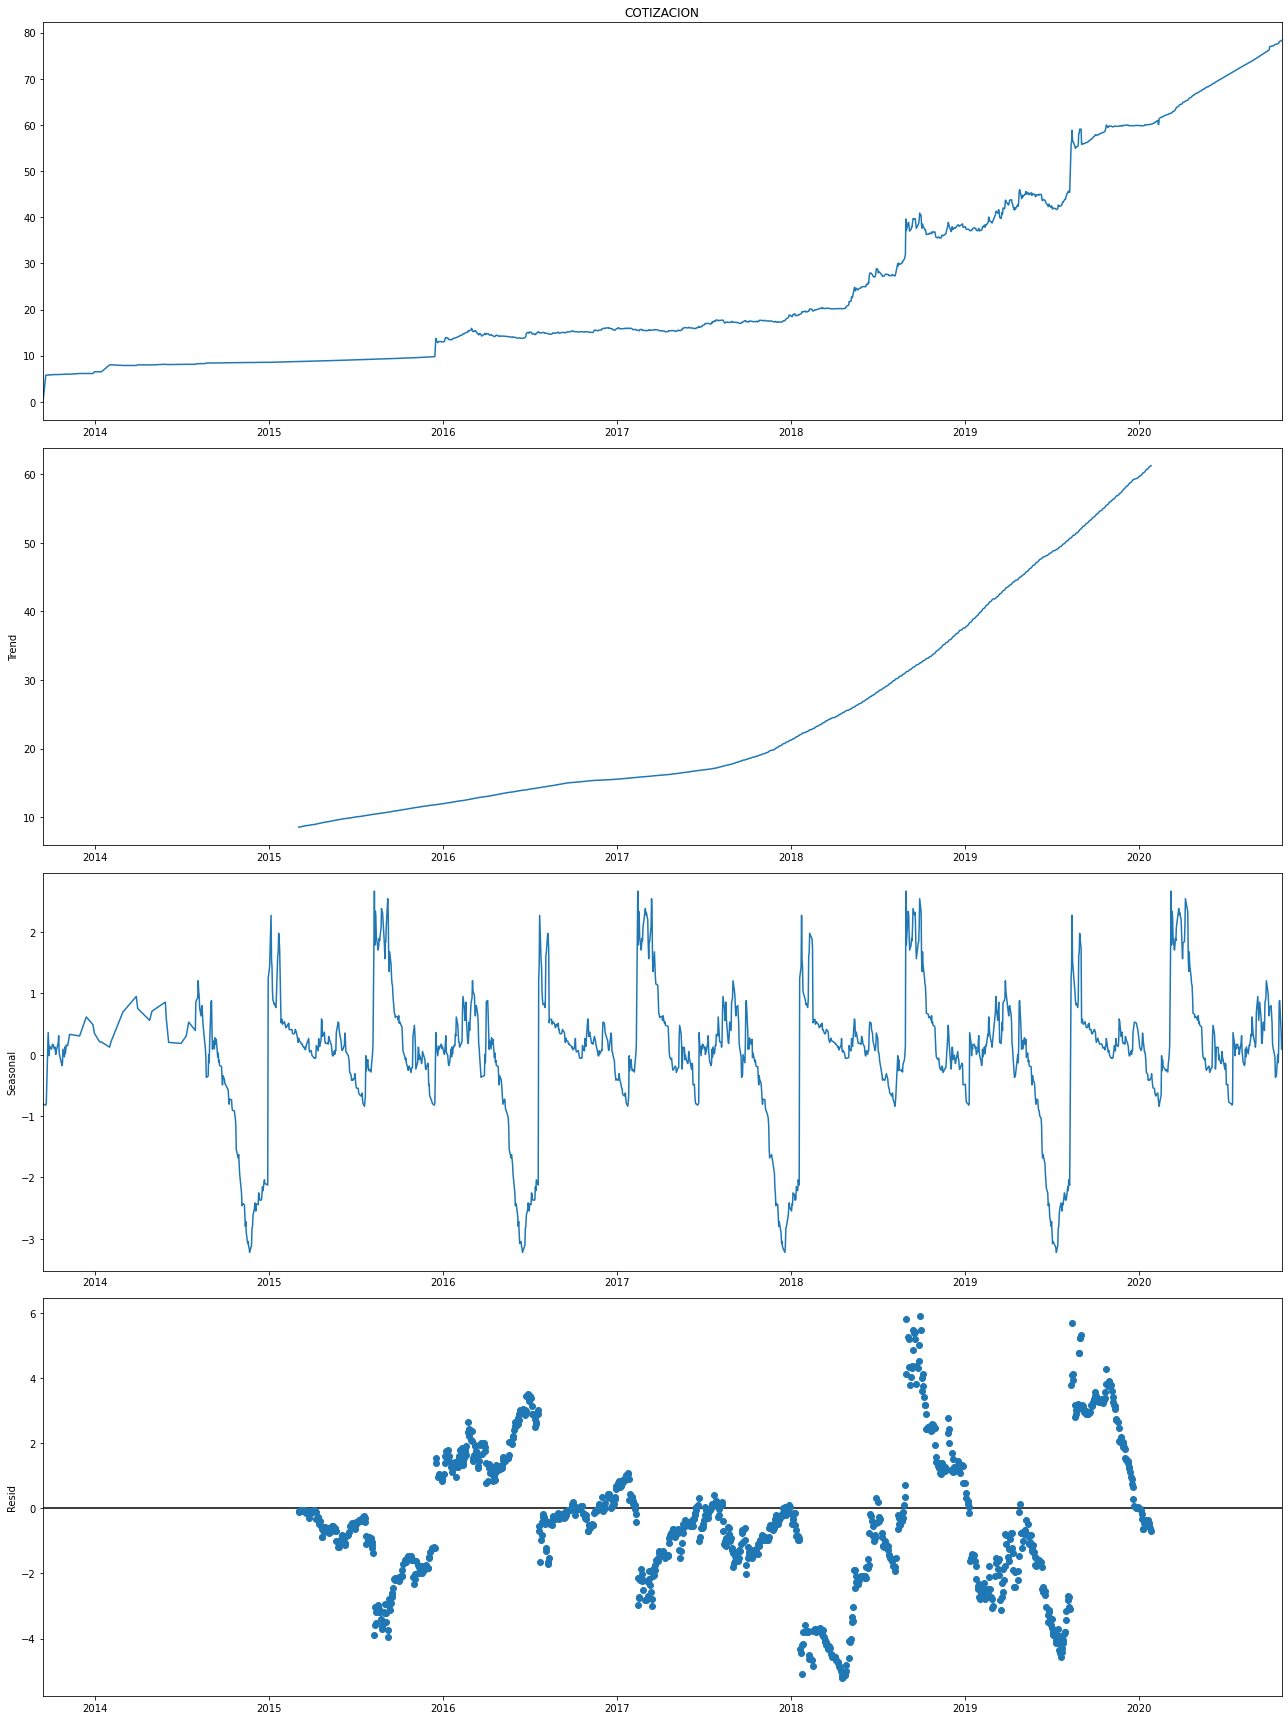

In [21]:
matplotlib.rcParams['figure.figsize'] = [18,24]
result.plot()